In [240]:
#Nicole Zawadzki
#ASTR400b Project
#April 10th
#Plot the density profile for M33
#No more test, this is the real deal

In [241]:
#import modules
import numpy as np
import astropy.units as u

#import plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [242]:
#import relevant files
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassDistribution import MassProfile

In [243]:
#find snapshots to calculate the density at
#use apocenter and pericenter of M33 orbit around M31
#adapting code from bonus question in homework 6

#read in orbit text file
fM33 = np.genfromtxt('SnapData_M33.txt', dtype=None, names=True)
fM31 = np.genfromtxt('SnapData_M31.txt', dtype=None, names=True)
t = fM33['t']
snap = fM33['snap']

#find separation between M33 and M31
xsep = abs(fM31['x'] - fM33['x'])
ysep = abs(fM31['y'] - fM33['y'])
zsep = abs(fM31['z'] - fM33['z'])
rsep = np.sqrt(xsep**2 + ysep**2 + zsep**2)

#define array to store desired times
time_array = []

#loop over r separation to find apocenters and pericenters
for i in range(len(rsep)):
    #if the middle separation is the greatest, this is the apocenter, and store the time
    try: 
        if rsep[i-2]<rsep[i-1] and rsep[i-1]>rsep[i]:
            time_array.append(t[i])
    #if the middle separation is the smallest, this is the pericenter, and store the time
        elif rsep[i-2]>rsep[i-1] and rsep[i-1]<rsep[i]:
            time_array.append(t[i])
        else:
            a=0 #else do nothing
    except: 
        a=0

time_array = np.round_(time_array,4)
print time_array


[  0.     0.07   1.     2.79   4.36   5.5    6.86   7.57   8.36   9.     9.64
  10.14  10.64  11.14]


In [244]:
#finding the snapshots I need to plot the density profiles at the apo/pericenters
shot = np.zeros(shape=len(time_array))
for i in range(len(time_array)):
    ind = np.where(t==time_array[i])
    shot[i] = snap[ind]

print shot    

[   0.    5.   70.  195.  305.  385.  480.  530.  585.  630.  675.  710.
  745.  780.]


In [245]:
#function that finds the density of M33 at a radius
def DensityProfile(galaxy, snap, R):
    #input: galaxy name, snapshot, and raduis array 
    #return: array of densities at each r in inupt array
    
    #This section is taken from other assignments
    #reconstruct file
    #add string of the filenumber to find value "000"
    ilbl = '000' + str(snap)
    #remove all but the last 3 digits
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl + '.txt'

    #read in data from ReadFile
    time, total, data = Read(filename)
    
    #index for disk particles
    ptype = np.where(data['type'] == 2)
    
    #store position and mass from ReadFile for disk particles
    x = data['x'][ptype]
    y = data['y'][ptype]
    z = data['z'][ptype]
    m = data['m'][ptype]*1e10
    
    #create Center of Mass object for disk particles
    COM = CenterOfMass(filename,2)
    COMP = COM.COM_P(1.0,4.0)
    
    #mass profile object
    Profile = MassProfile(galaxy,snap)
    DiskMass = Profile.MassEnclosed(2,R)
    
    #find position relative to COM
    x2 = x - COMP[0]
    y2 = y - COMP[1]
    z2 = z - COMP[2]
    r = np.sqrt(x2**2 + y2**2 + z2**2)
    #print len(r)
    #print r
    #define density array
    density = np.zeros(shape=len(R))
    
    #This is the new stuff
    #loop over radius array to find density at certain radius
    for radius in range(len(R)):
        #finding the volume at radius
        #want the volume of spherical shell--(4/3)pi(R^3-r^3) where R is outer radius and r is inner radius
        vol = (4.0/3.0)*np.pi*(R[radius]**3-R[radius-1]**3)
        #find and store particle masses within given radius
        index = np.where((r<R[radius]) & (r>R[radius-1]))
        #print R[radius]
        #print np.shape(index)
        density[radius-1] = np.sum(m[index])/vol
        
    return density*u.Msun/u.kpc
      

In [246]:
#defining radius array and using the function on each snapshot to get the profile
R = np.arange(0.01,80,1)

M33density1 = DensityProfile('M33', 0, R)
M33density2 = DensityProfile('M33', 5, R)
M33density3 = DensityProfile('M33', 70, R)
M33density4 = DensityProfile('M33', 195, R)
M33density5 = DensityProfile('M33', 305, R)
M33density6 = DensityProfile('M33', 385, R)
M33density7 = DensityProfile('M33', 480, R)
M33density8 = DensityProfile('M33', 530, R)
M33density9 = DensityProfile('M33', 585, R)
M33density10 = DensityProfile('M33', 630, R)
M33density11 = DensityProfile('M33', 675, R)
M33density12 = DensityProfile('M33', 710, R)
M33density13 = DensityProfile('M33', 745, R)
M33density14 = DensityProfile('M33', 780, R)
#print M33density1

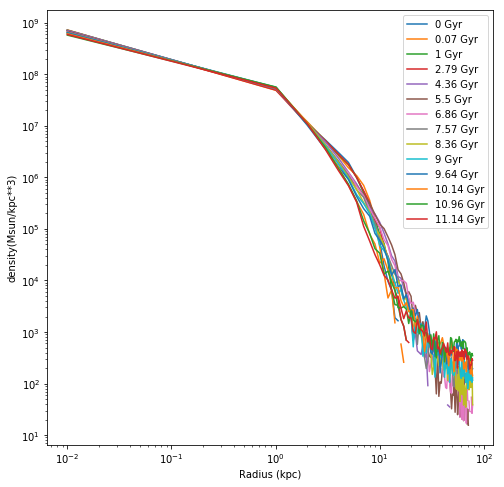

In [247]:
#plotting the densitiy profiles 
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.semilogy(R,M33density1, label='0 Gyr')
plt.semilogy(R,M33density2, label='0.07 Gyr')
plt.semilogy(R,M33density3, label='1 Gyr')
plt.semilogy(R,M33density4, label='2.79 Gyr')
plt.semilogy(R,M33density5, label='4.36 Gyr')
plt.semilogy(R,M33density6, label='5.5 Gyr')
plt.semilogy(R,M33density7, label='6.86 Gyr')
plt.semilogy(R,M33density8, label='7.57 Gyr')
plt.semilogy(R,M33density9, label='8.36 Gyr')
plt.semilogy(R,M33density10, label='9 Gyr')
plt.semilogy(R,M33density11, label='9.64 Gyr')
plt.semilogy(R,M33density12, label='10.14 Gyr')
plt.semilogy(R,M33density13, label='10.96 Gyr')
plt.semilogy(R,M33density14, label='11.14 Gyr')
#plt.xlim(10,100)
#plt.ylim(100,10e7)
plt.xlabel('Radius (kpc)')
plt.xscale('log')
plt.ylabel('density(Msun/kpc**3)')
legend = ax.legend()

# Save to a file
#ax.set_rasterized(True)
#plt.savefig('DensityProfile.eps', rasterized=True, dpi=350)

In [248]:
#see number of particles within shells
def DensityHist(filename):
    #input: name of desired file
    #return: array of the distance each particle is from the center of mass
    
    #create Center of Mass object for disk particles
    COM = CenterOfMass(filename,2)
    COMP = COM.COM_P(1.0,4.0)
    
    #find position relative to COM
    x2 = COM.x - COMP[0]
    y2 = COM.y - COMP[1]
    z2 = COM.z - COMP[2]
    R = np.sqrt(x2**2 + y2**2 + z2**2)
    #index = np.where(R>0.1)
    return R
   

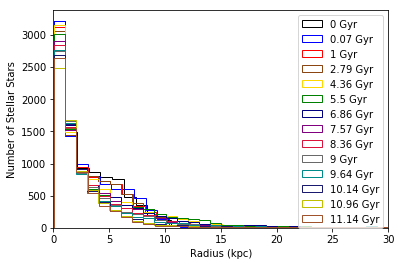

In [249]:
#finding the number of particles within a radius at each desired snapshot
r0 = DensityHist("M33_000.txt")
r1 = DensityHist("M33_005.txt")
r2 = DensityHist("M33_070.txt")
r3 = DensityHist("M33_195.txt")
r4 = DensityHist("M33_305.txt")
r5 = DensityHist("M33_385.txt")
r6 = DensityHist("M33_480.txt")
r7 = DensityHist("M33_530.txt")
r8 = DensityHist("M33_585.txt")
r9 = DensityHist("M33_630.txt")
r10 = DensityHist("M33_675.txt")
r11 = DensityHist("M33_710.txt")
r12 = DensityHist("M33_745.txt")
r13 = DensityHist("M33_780.txt")
#plotting the histogram
fig = plt.figure()
#for the bin size--normalized it by having the size of bins basically the longest radius
#that way bin size isnt affected by how far out the particles go
plt.hist(r0, bins=int(max(r0)-min(r0)), color='k', histtype='step', fill=False, label='0 Gyr')
plt.hist(r1, bins=int(max(r1)-min(r1)), color='blue', histtype='step', fill=False, label='0.07 Gyr')
plt.hist(r2, bins=int(max(r2)-min(r2)), color='red', histtype='step', fill=False, label='1 Gyr')
plt.hist(r3, bins=int(max(r3)-min(r3)), color='saddlebrown', histtype='step', fill=False, label='2.79 Gyr')
plt.hist(r4, bins=int(max(r4)-min(r4)), color='gold', histtype='step', fill=False, label='4.36 Gyr')
plt.hist(r5, bins=int(max(r5)-min(r5)), color='g', histtype='step', fill=False, label='5.5 Gyr')
plt.hist(r6, bins=int(max(r6)-min(r6)), color='navy', histtype='step', fill=False, label='6.86 Gyr')
plt.hist(r7, bins=int(max(r7)-min(r7)), color='purple', histtype='step', fill=False, label='7.57 Gyr')
plt.hist(r8, bins=int(max(r8)-min(r8)), color='crimson', histtype='step', fill=False, label='8.36 Gyr')
plt.hist(r9, bins=int(max(r9)-min(r9)), color='dimgrey', histtype='step', fill=False, label='9 Gyr')
plt.hist(r10, bins=int(max(r10)-min(r10)), color='darkcyan', histtype='step', fill=False, label='9.64 Gyr')
plt.hist(r11, bins=int(max(r11)-min(r11)), color='midnightblue', histtype='step', fill=False, label='10.14 Gyr')
plt.hist(r12, bins=int(max(r12)-min(r12)), color='y', histtype='step', fill=False, label='10.96 Gyr')
plt.hist(r13, bins=int(max(r13)-min(r13)), color='sienna', histtype='step', fill=False, label='11.14 Gyr')
#plt.ylim(0,200)
plt.xlim(0,30)
plt.xlabel('Radius (kpc)')
plt.ylabel('Number of Stellar Stars')
#plt.title('Distribution of Stars',fontsize=22)
plt.legend()
#plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.5)
# Save to a file
#ax.set_rasterized(True)
#plt.savefig('Histogram1.eps', rasterized=True, dpi=350)

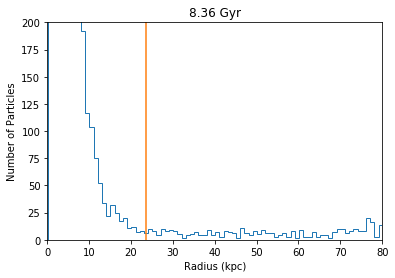

In [250]:
#array of tidal radii gotten from analytic radius code
radiusarray = [81.2250102, 77.25865241, 36.736648, 87.49144999, 27.8029702,
               67.04157738, 27.163958, 50.23613576, 23.64408111, 41.71007383,
               21.76678945, 36.23119457, 19.35584701, 33.64292516]
#plot the analytic solution onto the histogram to see if the line up at all
#plotting a pericenter and apocenter
#for formatting purposes in the report have to save each graph as a seperate file
#so the series of command for plotting one of the histograms is commented out

#plt.figure(1)
#plt.subplot(121)
#plt.hist(r7, bins=500, histtype='step', fill=False)
#plt.plot((radiusarray[7], radiusarray[7]), (0,200))
#plt.title('7.57 Gyr')
#plt.xlim(0,80)
#plt.ylim(0,200)
#plt.ylabel('Number of Particles')
#plt.xlabel('Radius (kpc)')

plt.figure(2)
plt.hist(r8, bins=int(max(r8)-min(r8)), histtype='step', fill=False)
plt.plot((radiusarray[8], radiusarray[8]), (0,200))
plt.title('8.36 Gyr')
plt.xlim(0,80)
plt.ylim(0,200)
plt.xlabel('Radius (kpc)')
plt.ylabel('Number of Particles')
#plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)
# Save to a file
#ax.set_rasterized(True)
#plt.savefig('HistogramWithAnalyticRadius2.eps', rasterized=True, dpi=350)

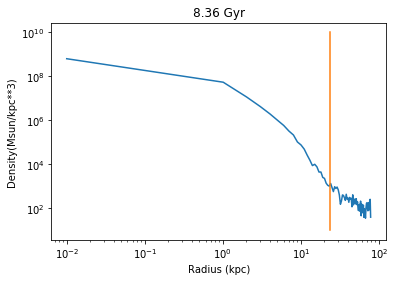

In [251]:
#plotting the density profiles with the analytic tidal radius for an apocenter and pericenter
#similar to the histogram plot above--also commented out one sequence of plotting commands
fig = plt.figure(1)
#plt.semilogy(R,M33density8)
#plt.plot((radiusarray[7], radiusarray[7]),(10e0,10e9))
#plt.xlabel('Radius (kpc)')
#plt.xscale('log')
#plt.ylabel('Density(Msun/kpc**3)')
#plt.title('7.57 Gyr')

#plt.subplot(234)
plt.semilogy(R,M33density9)
plt.plot((radiusarray[8], radiusarray[8]),(10e0,10e9))
plt.xlabel('Radius (kpc)')
plt.xscale('log')
plt.ylabel('Density(Msun/kpc**3)')
plt.title('8.36 Gyr')

#plt.subplots_adjust(top=1.3, bottom=0.08, left=0.1, right=1.5, hspace=0.25, wspace=0.35)

# Save to a file
#ax.set_rasterized(True)
#plt.savefig('DensityWithAnalyticRadius2.eps', rasterized=True, dpi=350)

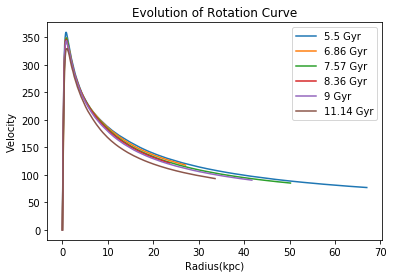

In [252]:
#Made this thing but ran out of time to properly explore its meaning and write about it
#plot the rotation curves of particles within the tidal radius
def RotationCurve(snap, rmax):
    #input: snapshot and the maxium radius (tidal radius) of bound particles
    #return: array of velocities over an array of radii    
    #make radius array
    rarr = np.arange(0.01,rmax,0.1)
    #make mass profile class objects for the snap
    M33MassProfile = MassProfile('M33',snap)
    #find circular velocity for disk particles within rmax
    M33Velocity = M33MassProfile.CircularVelocity(2,rarr)
    
    return M33Velocity

fig = plt.figure()
plt.subplot(111)
#plt.subplot(231)
r = np.arange(0.01,radiusarray[5],0.1)
plt.plot(r,RotationCurve(385,radiusarray[5]), label='5.5 Gyr')
r = np.arange(0.01,radiusarray[6],0.1)
#plt.subplot(232)
plt.plot(r,RotationCurve(480,radiusarray[6]), label='6.86 Gyr')
r = np.arange(0.01,radiusarray[7],0.1)
#plt.subplot(233)
plt.plot(r,RotationCurve(530,radiusarray[7]), label='7.57 Gyr')
r = np.arange(0.01,radiusarray[8],0.1)
#plt.subplot(234)
plt.plot(r,RotationCurve(585,radiusarray[8]), label='8.36 Gyr')
r = np.arange(0.01,radiusarray[9],0.1)
#plt.subplot(235)
plt.plot(r,RotationCurve(630,radiusarray[9]), label='9 Gyr')
r = np.arange(0.01,radiusarray[10],0.1)
#plt.subplot(236)
#plt.plot(r,RotationCurve(675,radiusarray[10]), label='9.64 Gyr')
r = np.arange(0.01,radiusarray[11],0.1)
#plt.subplot(236)
#plt.plot(r,RotationCurve(710,radiusarray[11]), label='10.14 Gyr')
r = np.arange(0.01,radiusarray[12],0.1)
#plt.subplot(236)
#plt.plot(r,RotationCurve(745,radiusarray[12]), label='10.96 Gyr')
r = np.arange(0.01,radiusarray[13],0.1)
#plt.subplot(236)
plt.plot(r,RotationCurve(780,radiusarray[13]), label='11.14 Gyr')
plt.legend()
plt.xlabel('Radius(kpc)')
plt.ylabel('Velocity')
plt.title('Evolution of Rotation Curve')